In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

C:\Users\nguye\AppData\Local\Temp\ipykernel_19980\2376525410.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
class linear_regression(object):
    def __init__(self): 
        self.coef = 0.0
        self.intercept = 0.0
        self. x_bar = 0.0
        self.y_bar = 0.0
        self.numerator = 0.0
        self.denominator = 0.0
    def fit(self, array_x:list, array_y:list):
        length = len(array_x)
        for i in range(length):
            self.x_bar += array_x[i]
            self.y_bar += array_y[i]
        self.x_bar /= length
        self.y_bar /= length
        for i in range(length):
            self.numerator += (array_x[i] - self.x_bar) * (array_y[i] - self.y_bar)
            self.denominator += (array_x[i] - self.x_bar) * (array_x[i] - self.x_bar)
        self.coef = self.numerator / self.denominator
        self.intercept = self.y_bar - self.coef * self.x_bar
    def predict(self, array_x:list) -> list:
        array_y = [(self.intercept + x * self.coef) for x in array_x]
        return array_y
        
        
        

In [5]:
n = np.random.rand(len(df)) < 0.8
x = df['ENGINESIZE']
y = df['CO2EMISSIONS']
train_x = [x[i] for i in range(len(n)) if (n[i]) ]
train_y = [y[i] for i in range(len(n)) if (n[i]) ]
test_x = [x[i] for i in range(len(n)) if (n[i] == False) ]
test_y = [y[i] for i in range(len(n)) if (n[i] == False) ]
print(train_x)



[2.0, 2.4, 1.5, 3.5, 3.5, 3.7, 2.4, 2.4, 3.5, 4.7, 4.7, 4.7, 4.7, 5.9, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 6.3, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.2, 4.2, 5.2, 5.2, 4.2, 4.2, 5.2, 5.2, 4.2, 4.2, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 2.0, 2.0, 4.0, 6.0, 4.0, 6.0, 6.0, 6.8, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 4.4, 4.4, 4.4, 4.4, 4.4, 3.0, 4.4, 4.4, 6.0, 3.0, 3.0, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 2.0, 3.0, 3.0, 3.0, 4.4, 4.4, 3.0, 3.0, 3.0, 3.6, 3.6, 1.4, 3.6, 3.6, 2.0, 2.4, 2.0, 2.0, 2.4, 2.0, 2.0, 2.5, 3.6, 2.0, 3.6, 3.6, 2.0, 3.6, 2.0, 3.6, 3.6, 3.6, 3.0, 3.6, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 6.2, 6.2, 6.2, 1.4, 1.4, 1.8, 1.8, 2.0, 1.4, 1.4, 2.4, 3.6, 3.6, 2.4, 3.6, 3.6, 4.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 4.8, 6.0, 4.8, 6.0, 6.0, 3.6, 2.4, 2.5, 2.4, 2.4, 4.3, 5.3, 5.3, 6.2, 4.3, 4.3, 5.3, 5.3, 1.4, 1.8, 1.8, 1.4, 1.4,

In [6]:
regression = linear_regression()
regression.fit(train_x, train_y)
print(regression.coef)
print(regression.intercept)
tr_y = [(regression.coef * x + regression.intercept) for x in train_x]

39.76457652262571
122.71006826956963


Text(0, 0.5, 'CO2EMISSIONS')

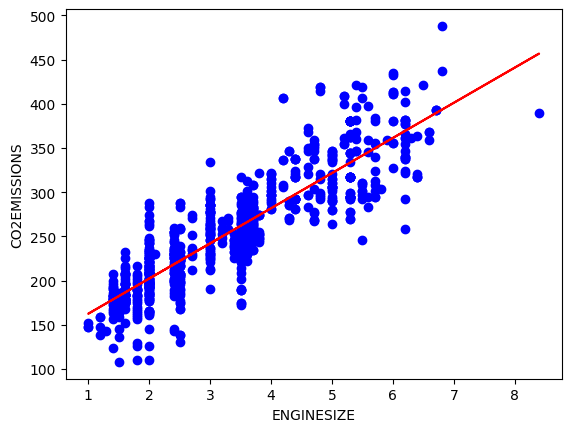

In [7]:
plt.scatter(train_x, train_y, color = 'blue')
plt.plot(train_x, tr_y, '-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
         

In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
train = cdf[n]
test = cdf[~n]

In [9]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[39.76457652]]
Intercept:  [122.71006827]


In [12]:
predict_y = regression.predict(test_x)
predict_y = np.array(predict_y)
test_y = np.array(test_y)
print("Mean absolute error: %.2f" % np.mean(np.absolute(predict_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict_y - test_y) ** 2))
RSE_nu = np.mean((predict_y - test_y) ** 2)
RSE_de = np.mean((regression.y_bar- test_y) ** 2)
R_score = 1 - RSE_nu / RSE_de
print("R2-score: %.2f" % R )


Mean absolute error: 23.40
Residual sum of squares (MSE): 927.72
R2-score: 0.75


In [11]:
from sklearn.metrics import r2_score

x = np.asanyarray(test[['ENGINESIZE']])
y = np.asanyarray(test[['CO2EMISSIONS']])
y_ = regr.predict(x)
y = np.array(y)
y_ = np.array(y_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_ - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_ - y) ** 2))
print("R2-score: %.2f" % r2_score(y , y_) )

Mean absolute error: 23.40
Residual sum of squares (MSE): 927.72
R2-score: 0.75
